## In Class Activity - September 1, 2022

This activity is meant to give you some exploration of topics within class. I've created the code for you to run the activity and explore some data. 

The goals of this activity are as follows: 

1. Explore what happens if the X and Y attributes are flipped in a linear regression. 
    + What happens to the linear regression coefficient estimates (ie., the $\hat{\beta}$)?
    + What happens to the sigma and R-Square statistics?
2. Given what you find in #1, how do you decide which attribute should be an outcome (Y) vs a predictor (X)?

In [1]:
library(tidyverse)
library(palmerpenguins)
library(ggformula)
library(mosaic)

theme_set(theme_bw(base_size = 16))

# If you get errors, use this line of code too.
# penguins <- readr::read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv")

head(penguins)

model_fit <- function(outcome, predictor, data = penguins) {
    formula <- as.formula(paste(outcome, predictor, sep = "~"))
    model_out <- lm(formula, data = data)

    model_coef <- data.frame(matrix(c(coef(model_out)), ncol = 2))
    names(model_coef) <- c("Intercept", "Slope")

    data.frame(model_coef, 
    Rsquare = summary(model_out)$r.square,
    sigma = summary(model_out)$sigma)
}

visualize_relationship <- function(outcome, predictor, data = penguins, 
     add_regression_line = TRUE, add_smoother_line = FALSE) {
    formula <- as.formula(paste(outcome, predictor, sep = "~"))

    if(add_regression_line & !add_smoother_line) {
        gf_point(gformula = formula, data = data, size = 4) |>
          gf_smooth(method = 'lm', size = 1.5) |> print()
    }
    if(add_smoother_line & !add_regression_line) {
        gf_point(gformula = formula, data = data, size = 4) |>
          gf_smooth(method = 'loess', size = 1.5) |> print()
    }
    if(add_smoother_line & add_regression_line) {
        gf_point(gformula = formula, data = data, size = 4) |>
          gf_smooth(method = 'lm', size = 1.5) |>
          gf_smooth(method = 'loess', size = 1.5, linetype = 2) |> print()
    }
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: ggstance


Attaching package: ‘ggstance’


The following objects are masked from ‘package:ggplot2’:

    GeomErrorbarh, geom_errorbarh


Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: ggridges


New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")

Registered S3 method overwritten by 'mosaic':
  method 

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


## Compute Correlation

The following code chunk can help you compute correlations between attributes. To use the function, you can replace "outcome" with an attribute name from the data above and "predictor" with another attribute above. 

1. What happens when you flip the outcome / predictor outcomes when computing the correlation? Does the correlation change? Why or why not? 
2. Given the correlation computed, how is it interpreted? 
3. Given the correlation computed, what information would this tell us when we try estimate the regression coefficients below? 

In [2]:
cor(bill_length_mm ~ flipper_length_mm, data = penguins, use = 'complete.obs') |> round(3)

[1] 0.656

## Visualize bivariate distribution

The following code creates a scatter plot showing the bivariate association between the two attributes entered. Example code is shown below as an example. You can replace the "outcome" and "predictor" with the two continuous attributes that you are interested in exploring. These need to be entered in quotations, either single or double are fine. You can also add a regression line or smoother line by specifying those arguments as either TRUE (ie., Yes) or FALSE (ie., No). 

1. Does the association between the two attributes appear to be linear? 
2. What happens to the association if you flip the predictor / outcome attributes? 
3. How would you summarize the association in a few sentences? 

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


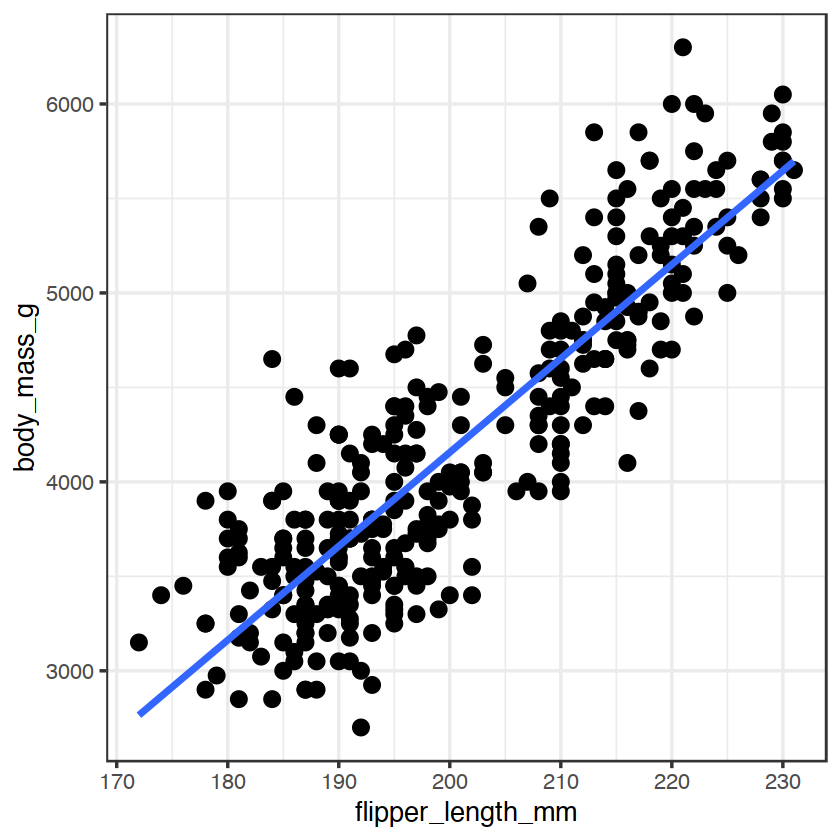

In [2]:
visualize_relationship(outcome = 'body_mass_g',
          predictor = 'flipper_length_mm',
          data = penguins,
          add_regression_line = TRUE,
          add_smoother_line = FALSE)

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


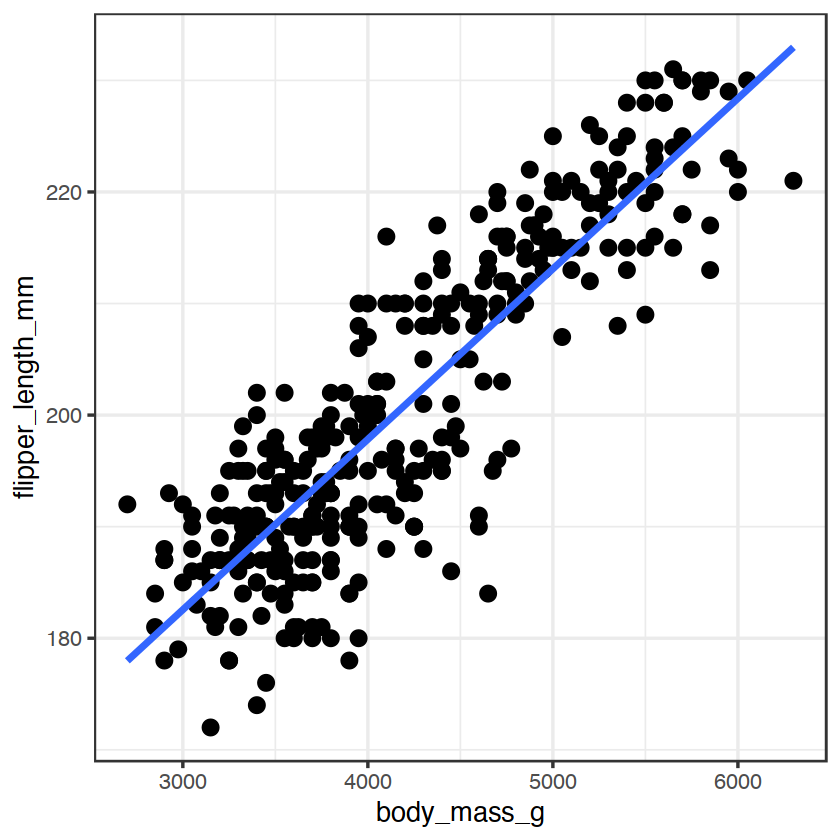

In [3]:
visualize_relationship(outcome = 'flipper_length_mm',
          predictor = 'body_mass_g',
          data = penguins,
          add_regression_line = TRUE,
          add_smoother_line = FALSE)

## Linear Regression Fitting

Similar to the bivariate scatterplot, the following function was created to fit a linear regression and extract some information about the model. The output should include the Intercept, Slope, R-square, and sigma estimates. You can specify the outcome and predictor by replacing those as you did in the bivariate scatterplot above to reflect the attributes you are interested in exploring. 

1. How are the 4 estimates interpreted, particularly in the context of the problem?
2. What happens to the 4 estimates if you flip the outcome and predictor attributes? 
    + Which one should truly be the outcome and what should guide this?

In [4]:
model_fit(outcome = 'body_mass_g',
          predictor = 'flipper_length_mm',
          data = penguins)

Intercept,Slope,Rsquare,sigma
<dbl>,<dbl>,<dbl>,<dbl>
-5780.831,49.68557,0.7589925,394.2782


$$
body\_mass = \beta_{0} + \beta_{1} flipper\_length
$$

In [5]:
model_fit(outcome = 'flipper_length_mm',
          predictor = 'body_mass_g',
          data = penguins)

Intercept,Slope,Rsquare,sigma
<dbl>,<dbl>,<dbl>,<dbl>
136.7296,0.01527592,0.7589925,6.913393


In [6]:
.015 * 1000

[1] 15

$$
flipper\_length = \beta_{0} + \beta_{1} body\_mass
$$